# Store Sales Prediction

## Aim: ML model to predict the sales of the different stores of Big Mart according to the provided dataset.

## Description: 
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.


### Features overview:
- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

- Missing values
- Converting categorical to numerical features
- Replacing outliers in continuos features
- Feature selection

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_frame=pd.read_csv('test.csv')

In [4]:
data_frame.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
data_frame.shape

(5681, 11)

## Spliting the data frame into categorical and numerical

In [6]:
categorical_features=[]
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)
    else:
        numerical_features.append(cols)

## Converting categorical data into numerical data

In [7]:
cat_data_frame=data_frame[categorical_features]

In [8]:
cat_data_frame.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,Dairy,OUT017,NaN,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,NaN,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [9]:
for cols in cat_data_frame.columns:
    print('{} has {} unique values'.format(cols,len(cat_data_frame[cols].unique())))

Item_Identifier has 1543 unique values
Item_Fat_Content has 5 unique values
Item_Type has 16 unique values
Outlet_Identifier has 10 unique values
Outlet_Size has 4 unique values
Outlet_Location_Type has 3 unique values
Outlet_Type has 4 unique values


### Missing values

In [10]:
cat_data_frame.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [11]:
cat_data_frame['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [12]:
cat_data_frame['Outlet_Size']=cat_data_frame['Outlet_Size'].fillna('Medium')

In [13]:
cat_data_frame.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,Dairy,OUT017,Medium,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,Medium,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,Medium,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [14]:
cat_data_frame.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [15]:
#label encoding
def label_encoding(cols):
    rank=cat_data_frame[cols].value_counts(ascending=True).index
    mapping={i:k for k,i in enumerate(rank,0)}
    cat_data_frame[cols]=cat_data_frame[cols].map(mapping)

In [16]:
for cols in cat_data_frame.columns:
    label_encoding(cols)

In [17]:
cat_data_frame.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1517,4,15,5,2,0,3
1,1414,1,11,2,2,1,3
2,953,4,2,1,2,2,2
3,592,4,15,2,2,1,3
4,957,3,11,9,2,2,1


## Handling missing data in numerical features

In [18]:
num_data_frame=data_frame[numerical_features]

In [19]:
num_data_frame.isnull().sum()

Item_Weight                  976
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
dtype: int64

In [20]:
num_data_frame['Item_Weight']=num_data_frame['Item_Weight'].fillna(num_data_frame['Item_Weight'].median())

## Replacing outliers in Continuos features in num_data_frame

In [21]:
#function to find the upper limit and lower limit in a feature
def replace_outlier(data):
    q1,q3=data.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [24]:
#ios_min,ios_max=replace_outlier(num_data_frame['Item_Outlet_Sales'])
iv_min,iv_max=replace_outlier(num_data_frame['Item_Visibility'])

In [26]:
#replacing the outliers with the upper limit
#num_data_frame['Item_Outlet_Sales']=np.where(num_data_frame['Item_Outlet_Sales']>ios_max,ios_max,num_data_frame['Item_Outlet_Sales'])
num_data_frame['Item_Visibility']=np.where(num_data_frame['Item_Visibility']>iv_max,iv_max,num_data_frame['Item_Visibility'])

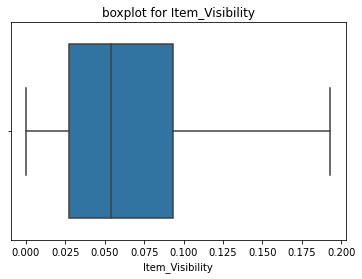

In [27]:
#Plotting the boxplots after replacing the outliers
plt.title('boxplot for Item_Visibility')
sns.boxplot(num_data_frame['Item_Visibility']);
plt.show()

In [28]:
num_data_frame.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,12.500,0.118599,234.2300,1985


In [29]:
## Concatinating the categorical and numerical features.
combined_data_frame=pd.concat([cat_data_frame,num_data_frame],axis=1)

In [30]:
combined_data_frame.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1517,4,15,5,2,0,3,20.750,0.007565,107.8622,1999
1,1414,1,11,2,2,1,3,8.300,0.038428,87.3198,2007
2,953,4,2,1,2,2,2,14.600,0.099575,241.7538,1998
3,592,4,15,2,2,1,3,7.315,0.015388,155.0340,2007
4,957,3,11,9,2,2,1,12.500,0.118599,234.2300,1985


In [31]:
combined_data_frame.shape

(5681, 11)

In [32]:
for cols in combined_data_frame.columns:
    print('{}: {}'.format(cols,combined_data_frame[cols].dtype))

Item_Identifier: int64
Item_Fat_Content: int64
Item_Type: int64
Outlet_Identifier: int64
Outlet_Size: int64
Outlet_Location_Type: int64
Outlet_Type: int64
Item_Weight: float64
Item_Visibility: float64
Item_MRP: float64
Outlet_Establishment_Year: int64


In [33]:
combined_data_frame.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [34]:
combined_data_frame.to_csv('final_input_test.csv',index=False)